In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
from google.colab import drive 
drive.mount("/content/gdrive", force_remount=True)
import pandas as pd
import os
path = os.getcwd()
path = "/content/gdrive/MyDrive/elula_assignment/"
data=pd.read_csv(path+"trip_data_4.csv")
fare=pd.read_csv(path+"trip_fare_4.csv")
# May data mismatch fare/data

## strip spaces
data.columns = [col.strip().replace(' ', '') for col in data.columns]
fare.columns = [col.strip().replace(' ', '') for col in fare.columns]
data.info()
fare.info()
#data.describe() 
#data.isnull().sum()
#data.nunique()
#data['pickup_datetime'].equals(fare['pickup_datetime'])

#!python -m pip install basemap
#from mpl_toolkits.basemap import Basemap


Mounted at /content/gdrive


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15100468 entries, 0 to 15100467
Data columns (total 14 columns):
 #   Column              Dtype  
---  ------              -----  
 0   medallion           object 
 1   hack_license        object 
 2   vendor_id           object 
 3   rate_code           int64  
 4   store_and_fwd_flag  object 
 5   pickup_datetime     object 
 6   dropoff_datetime    object 
 7   passenger_count     int64  
 8   trip_time_in_secs   int64  
 9   trip_distance       float64
 10  pickup_longitude    float64
 11  pickup_latitude     float64
 12  dropoff_longitude   float64
 13  dropoff_latitude    float64
dtypes: float64(5), int64(3), object(6)
memory usage: 1.6+ GB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15100468 entries, 0 to 15100467
Data columns (total 11 columns):
 #   Column           Dtype  
---  ------           -----  
 0   medallion        object 
 1   hack_license     object 
 2   vendor_id        object 
 3   pickup_datetime  object 


https://www.sixt.com/magazine/tips/driving-in-new-york-state/

*   Within city limits	30-45 mph (48-72 km/h)
*   Highways outside cities	55 mph (89 km/h)
*   Interstates	55-65 mph (89-105 km/h)


data for 2022 though


https://www.latlong.net/place/new-york-city-ny-usa-1848.html#:~:text=New%20York%20City%2C%20NY%2C%20USA%20Lat%20Long%20Coordinates%20Info,%C2%B0%2056'%206.8712''%20W.

New York City, NY, USA Lat Long Coordinates Info
The latitude of New York City, NY, USA is 40.730610, and the longitude is -73.935242. New York City, NY, USA is located at United States country in the Cities place category with the gps coordinates of 40° 43' 50.1960'' N and 73° 56' 6.8712'' W.
Data gives max dist = 100 miles or (81 miles aftercleaning)  (>100 km) indicates it might be rasonable to assume that an nyc taxi would remain near the city outskirts at max. area of nyc 783.8 km² (wikipedia) => 1 deg lat deviation and 2 deg long deviation seems reasonable.

https://www.thoughtco.com/degree-of-latitude-and-longitude-distance-4070616

1.   Each degree of latitude is approximately 69 miles 
2.   At 40 degrees north or south, the distance between a degree of longitude is 53 miles (85 kilometers).














In [ ]:
#@title Duration Anomaly Visualization
#plt.plot(duration - data["trip_time_in_secs"])

diff = diff[diff<5]
#plt.hist(x=diff, bins =20)
plt.plot(diff)
plt.ylabel('duration within the car - trip duration (s)')
plt.xlabel('trips')
plt.show()


###Lat
plt.plot(lat)
plt.ylabel("pickup latitude")
plt.xlabel("trips")
plt.show()

NameError: ignored

In [ ]:
#@title Visualize Speed Anomalies
# Check Speed (dist plot looks ok, hrs plot looks ok )
speed = 3600*data[' trip_distance']/data[' trip_time_in_secs']
fig, axs = plt.subplots(3)
axs[0].plot(data[' trip_distance'])
axs[0].set_title('Distance (km/mil)')
axs[1].plot(data[' trip_time_in_secs']/3600, 'tab:orange')
axs[1].set_title('Time (hrs)')
axs[2].plot(speed, 'tab:green')
axs[2].set_title('Speed (kmph)')
plt.show()
#data['pickup_datetime'].equals(fare['pickup_datetime'])
#n, bins, patches = plt.hist(x=speed, bins=50, color='#0504aa',alpha=0.7, rwidth=0.85)
#plt.grid(axis='y', alpha=0.75) plt.xlabel('speed') plt.ylabel('Frequency') plt.title('Histogram')

In [ ]:
#@title Visualize space anomaly
data.pickup_longitude.max()

2228.7222

In [ ]:
#@title Visualize incorrect total amount
## Check total amount is adding up or not otherwise add dispute
total_amount = fare.fare_amount	+ fare.surcharge	+ fare.mta_tax +	fare.tip_amount + fare.tolls_amount
dispute = total_amount - fare.total_amount
#plt.plot(dispute)
plt.hist(x=dispute, bins =80)
plt.xlabel('Extra fare (total amt - reported_total amt)')
plt.ylabel('Freq')
plt.show()

zeros = np.count_nonzero(dispute == 0.0)
zeros = 3783202 - zeros
print(f"There are {zeros} disputes in fares.")

# New Section

In [ ]:
####### Clean data (based on data)
data.isnull().sum()
## remove nans
data = data.drop('store_and_fwd_flag', axis=1)
## Remove the 146 
fare = fare[~data.dropoff_latitude.isnull()]
fare = fare[~data.dropoff_longitude.isnull()]
data = data[~data.dropoff_latitude.isnull()]
data = data[~data.dropoff_longitude.isnull()]
# Remove trip_time_in_secs = 0 (max is 3hrs)
fare = fare[data.trip_time_in_secs>0]
data = data[data.trip_time_in_secs>0]
# Remove trip_distance = 0 km/mil (max is 100 km/mil)
fare = fare[data.trip_distance>0.0]
data = data[data.trip_distance>0.0]
# Remove passenger_count = 0 || >=7 passengers (max is 9, illegal so improbable)
fare = fare[(data.passenger_count > 0)&(data.passenger_count < 7)]
data = data[(data.passenger_count > 0)&(data.passenger_count < 7)]
# Check Speed (dist plot looks ok, hrs plot looks ok )
speed = 3600*data['trip_distance']/data['trip_time_in_secs']
fare = fare[speed < 75]
data = data[speed < 75]
#### Duration inside the car should be greater than trip_duration
duration = (pd.to_datetime(data['dropoff_datetime']) - pd.to_datetime(data['pickup_datetime']))/np.timedelta64(1, 's')
diff = duration - data["trip_time_in_secs"]
fare = fare[diff >= 0]
data = data[diff >= 0]
#### Latitude - Longitude
fare = fare[(data.pickup_latitude >  39.73) & (data.pickup_latitude <  41.73)]
data = data[(data.pickup_latitude >  39.73) & (data.pickup_latitude <  41.73)]
fare = fare[(data.dropoff_latitude >  39.73) & (data.dropoff_latitude <  41.73)]
data = data[(data.dropoff_latitude >  39.73) & (data.dropoff_latitude <  41.73)]

fare = fare[(data.pickup_longitude>  -75.935) & (data.pickup_longitude < -71.935)]
data = data[(data.pickup_longitude >  -75.935) & (data.pickup_longitude < -71.935)]
fare = fare[(data.dropoff_longitude >  -75.935) & (data.dropoff_longitude < -71.935)]
data = data[(data.dropoff_longitude >  -75.935) & (data.dropoff_longitude < -71.935)]

data.describe()
#data['pickup_datetime'].equals(fare['pickup_datetime'])


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


,rate_code,passenger_count,trip_time_in_secs,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
count,1.405812e+07,1.405812e+07,1.405812e+07,1.405812e+07,1.405812e+07,1.405812e+07,1.405812e+07,1.405812e+07
mean,1.026148e+00,1.734038e+00,7.498423e+02,2.874189e+00,-7.397541e+01,4.075100e+01,-7.397480e+01,4.075144e+01
std,2.981585e-01,1.412569e+00,5.467619e+02,3.312467e+00,3.442330e-02,2.704337e-02,3.376967e-02,3.087564e-02
min,0.000000e+00,1.000000e+00,5.000000e+00,1.000000e-02,-7.563333e+01,3.973833e+01,-7.593333e+01,3.973081e+01
25%,1.000000e+00,1.000000e+00,3.620000e+02,1.070000e+00,-7.399231e+01,4.073660e+01,-7.399161e+01,4.073562e+01
50%,1.000000e+00,1.000000e+00,6.000000e+02,1.800000e+00,-7.398202e+01,4.075347e+01,-7.398048e+01,4.075398e+01
75%,1.000000e+00,2.000000e+00,9.600000e+02,3.200000e+00,-7.396796e+01,4.076790e+01,-7.396510e+01,4.076859e+01
max,2.100000e+02,6.000000e+00,1.080000e+04,8.955000e+01,-7.205000e+01,4.169986e+01,-7.206457e+01,4.168913e+01


In [ ]:
#@title Visualize Lat-long
#data.to_csv(path+'data.csv')
#fare.to_csv(path+"fare.csv")
data['pickup_datetime'].equals(fare['pickup_datetime'])

BBox = (-75.940,   -71.940,  39.730, 41.730)
# 69 miles ~ 111 km (3 decimals ~ 100m)
pickup_latitude = data.pickup_latitude.round(3)
pickup_longitude = data.pickup_longitude.round(3)
dropoff_latitude = data.dropoff_latitude.round(3)
dropoff_longitude = data.dropoff_longitude.round(3)

ruh_m = plt.imread(path+'map.png')
fig, ax = plt.subplots(figsize = (8,7))
ax.scatter(pickup_longitude, pickup_latitude, zorder=1, alpha= 0.2, c='b', s=5)
ax.scatter(dropoff_longitude, dropoff_latitude, zorder=1, alpha= 0.2, c='r', s=1)
ax.set_title('Plotting pick-up in blue and drop-off in red on NYC Map')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(ruh_m, zorder=0, extent = BBox, aspect= 'equal')

In [ ]:
####### Clean data (based on fare)
fare.isnull().sum()
fare.head(20)
## The total amount is not adding up so add dispute
fare.total_amount = fare.fare_amount	+ fare.surcharge	+ fare.mta_tax +	fare.tip_amount + fare.tolls_amount
## Check fare_amount vs distance scatter (expect linear pieces multiple since there are diff rates)
## merge data
taxi = data.merge(fare, on=['medallion','hack_license','vendor_id','pickup_datetime'], how='inner')
## Manual remove sea points
taxi.drop(taxi[(taxi.pickup_latitude < 40.25) & (taxi.pickup_longitude >-73.5)].index, inplace=True)
taxi.drop(taxi[(taxi.pickup_latitude < 40.25) & (taxi.pickup_longitude >-73.2)].index, inplace=True)
del data
del fare
taxi = taxi[((taxi.rate_code >=0 ) & (taxi.rate_code <=6 ))|(taxi.rate_code == 210)]
#taxi.rate_code.value_counts()
taxi = taxi[((taxi.rate_code >=0) & (taxi.rate_code <2))|((taxi.rate_code ==2 ) & (taxi.fare_amount >51 ))|((taxi.rate_code > 2 ) & (taxi.rate_code <7 ))]
taxi = taxi[(taxi.rate_code >=0 ) & (taxi.rate_code <7 ) & (taxi.fare_amount >=2.5 )]
taxi.to_csv(path+'taxi_dataFare.csv')
#data['pickup_datetime'].equals(fare['pickup_datetime'])


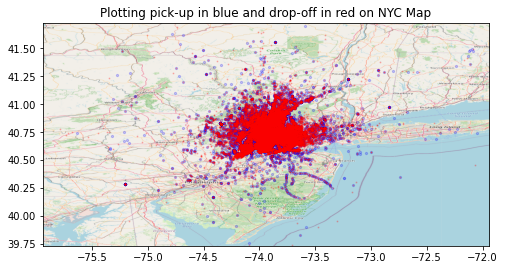

In [ ]:
#@title Visualize Lat-long

BBox = (-75.940,   -71.940,  39.730, 41.730)
# 69 miles ~ 111 km (3 decimals ~ 100m)
pickup_latitude = taxi.pickup_latitude.round(3)
pickup_longitude = taxi.pickup_longitude.round(3)
dropoff_latitude = taxi.dropoff_latitude.round(3)
dropoff_longitude = taxi.dropoff_longitude.round(3)

ruh_m = plt.imread(path+'map.png')
fig, ax = plt.subplots(figsize = (8,7))
ax.scatter(pickup_longitude, pickup_latitude, zorder=1, alpha= 0.2, c='b', s=5)
ax.scatter(dropoff_longitude, dropoff_latitude, zorder=1, alpha= 0.2, c='r', s=1)
ax.set_title('Plotting pick-up in blue and drop-off in red on NYC Map')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(ruh_m, zorder=0, extent = BBox, aspect= 'equal')

In [ ]:
#taxi.rate_code.value_counts().sum()
taxi.groupby(taxi.rate_code)[taxi.tip_amount]

In [ ]:
#@title Visualize Fare amount vs distance
plt.scatter(taxi.trip_distance,taxi.fare_amount)
plt.xlabel('Trip distance in miles')
plt.ylabel('Fare amount (without wait time consideration)')
plt.show()

NameError: ignored

https://www.taxi-calculator.com/taxi-fare-new-york-city/259 30 dollars 2022

https://www1.nyc.gov/site/tlc/passengers/taxi-fare.page - 2022 data, ratecodes for 2013 may be different. Its likely there exists no real codes 9,206,7,65


1.   Rate #01 – Standard City Rate
2.   Rate #2- JFK Airport
3.   Rate #3 - Newark Airport
4.   Rate #04 – Out of City Rate to Nassau or Westchester.
5.   Rate #05 – Out of City Negotiated Flat Rate.
6.   6=Group ride (https://www1.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)









In [ ]:
taxi.describe()


,rate_code,passenger_count,trip_time_in_secs,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount
count,1.405795e+07,1.405795e+07,1.405795e+07,1.405795e+07,1.405795e+07,1.405795e+07,1.405795e+07,1.405795e+07,1.405795e+07,1.405795e+07,1.405795e+07,1.405795e+07,1.405795e+07,1.405795e+07
mean,1.025936e+00,1.734041e+00,7.498398e+02,2.874175e+00,-7.397541e+01,4.075100e+01,-7.397481e+01,4.075144e+01,1.219020e+01,3.277729e-01,4.988705e-01,1.335199e+00,2.403706e-01,1.459241e+01
std,2.191707e-01,1.412575e+00,5.467587e+02,3.312442e+00,3.439904e-02,2.702402e-02,3.374490e-02,3.085964e-02,9.570823e+00,3.673583e-01,2.373802e-02,2.070013e+00,1.174551e+00,1.153440e+01
min,0.000000e+00,1.000000e+00,5.000000e+00,1.000000e-02,-7.563333e+01,3.975255e+01,-7.593333e+01,3.973949e+01,2.500000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.500000e+00
25%,1.000000e+00,1.000000e+00,3.620000e+02,1.070000e+00,-7.399231e+01,4.073660e+01,-7.399161e+01,4.073562e+01,6.500000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,8.000000e+00
50%,1.000000e+00,1.000000e+00,6.000000e+02,1.800000e+00,-7.398202e+01,4.075347e+01,-7.398048e+01,4.075398e+01,9.500000e+00,0.000000e+00,5.000000e-01,1.000000e+00,0.000000e+00,1.100000e+01
75%,1.000000e+00,2.000000e+00,9.600000e+02,3.200000e+00,-7.396796e+01,4.076790e+01,-7.396510e+01,4.076859e+01,1.400000e+01,5.000000e-01,5.000000e-01,2.000000e+00,0.000000e+00,1.650000e+01
max,6.000000e+00,6.000000e+00,1.080000e+04,8.955000e+01,-7.205000e+01,4.169986e+01,-7.206457e+01,4.168913e+01,4.707500e+02,1.500000e+01,5.000000e-01,2.000000e+02,2.000000e+01,6.281000e+02


In [ ]:
#@title visualize fare amt when trip time = time in car
hire_duration = (pd.to_datetime(taxi['dropoff_datetime']) - pd.to_datetime(taxi['pickup_datetime']))/np.timedelta64(1, 's')
wait_time = (hire_duration-taxi.trip_time_in_secs)/3600
taxi_no_wait = taxi[wait_time == 0]
## Separate by rate_code
rate1 = taxi_no_wait[taxi_no_wait.rate_code==1]
rate2 = taxi_no_wait[taxi_no_wait.rate_code==2]
rate3 = taxi_no_wait[taxi_no_wait.rate_code==3]
rate4 = taxi_no_wait[taxi_no_wait.rate_code==4]
rate0 = taxi_no_wait[taxi_no_wait.rate_code==0]
taxi_no_wait.rate_code.value_counts()
fig, axs = plt.subplots(5)
axs[0].scatter(rate1.trip_distance,rate1.fare_amount)
axs[0].set_title('Rate = 1')
axs[1].scatter(rate2.trip_distance,rate2.fare_amount)
axs[1].set_title('Rate = 2')
axs[2].scatter(rate3.trip_distance,rate3.fare_amount)
axs[2].set_title('Rate = 3')
axs[3].scatter(rate4.trip_distance,rate4.fare_amount)
axs[3].set_title('Rate = 4')
axs[4].scatter(rate0.trip_distance,rate0.fare_amount)
axs[4].set_title('Rate = 0')
plt.xlabel('Trip distance in miles')
plt.ylabel('Fare amount (when trip time = time inside taxi')
fig.set_figwidth(12)
fig.set_figheight(12)
plt.show()